<a href="https://colab.research.google.com/github/Harsh-eng568/IMBD-analysis/blob/main/Copy_of_imdb_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/imdb_movies (1).csv')
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [ ]:
df.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country'],
      dtype='object')

In [ ]:
len(df.columns)

62

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [ ]:
df.isnull().sum()

,0
Title,0
title_year,0
budget,0
Gross,0
actor_1_name,0
...,...
Votes1000,0
VotesUS,0
VotesnUS,0
content_rating,0


In [ ]:
d1 = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,60,61]]
print(d1.columns)
print(len(d1.columns))

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime',
       'content_rating', 'Country'],
      dtype='object')
18


**Question: Do higher-budget movies always make more money?**

 Insight: “While big-budget movies generally earn more, some low-budget films
 outperformed expectations

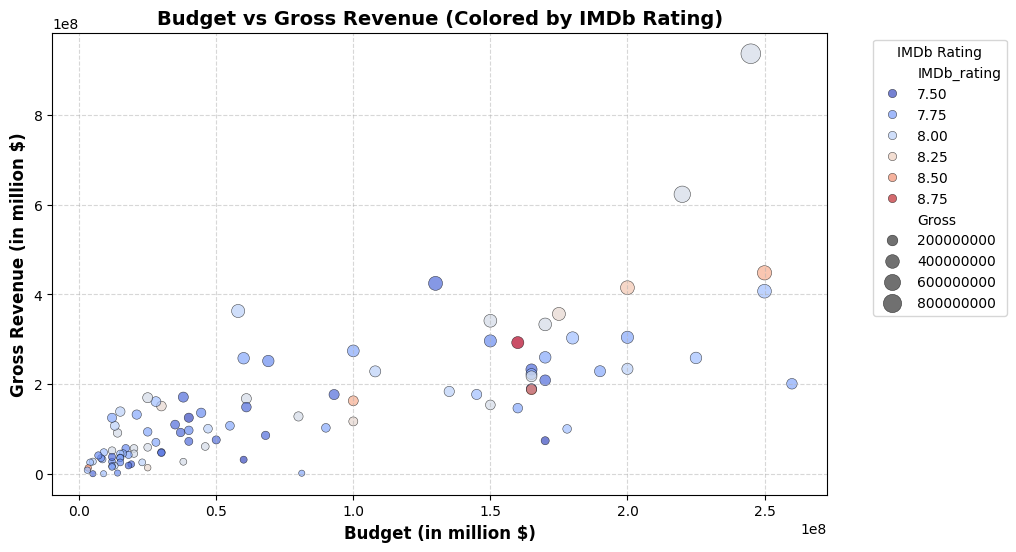

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['budget'], y=df['Gross'], alpha=0.7, edgecolor='black', hue=df['IMDb_rating'], palette='coolwarm', size=df['Gross'], sizes=(20, 200))
plt.xlabel('Budget (in million $)', fontsize=12, fontweight='bold')
plt.ylabel('Gross Revenue (in million $)', fontsize=12, fontweight='bold')
plt.title('Budget vs Gross Revenue (Colored by IMDb Rating)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='IMDb Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Question: Do highly-rated movies (IMDb & MetaCritic) always make more money?**

👉 Insight: “While Inception had a 8.8 IMDb rating, it didn’t perform well at the box office due to limited distribution.”

In [ ]:
fig = px.scatter(df, x='IMDb_rating', y='Gross', size='Gross', color='IMDb_rating', hover_name='Title',
                 title='IMDb Rating vs Gross Revenue', labels={'IMDb_rating': 'IMDb Rating', 'Gross': 'Gross Revenue'},
                 color_continuous_scale='Viridis', template='plotly_dark')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()

**Question: Does having popular actors lead to a successful movie?**

👉 Insight: “Movies tend to perform well, proving their box office appeal.”

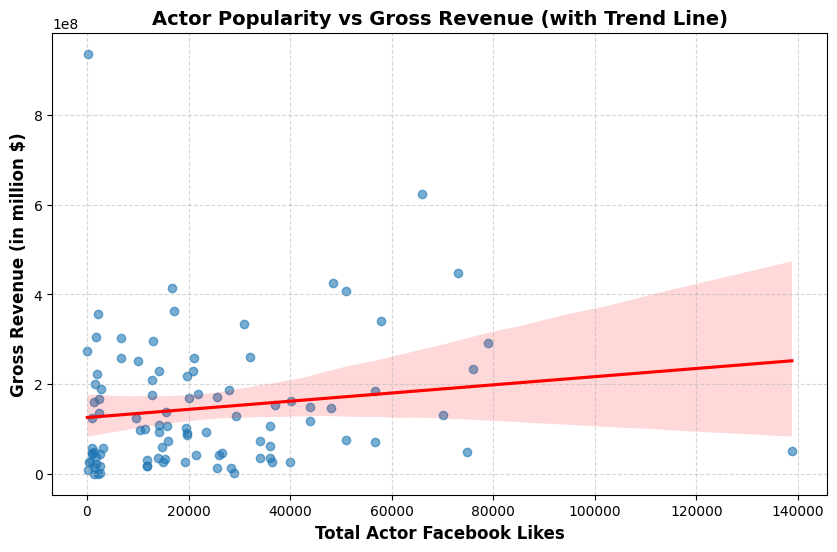

In [ ]:
df['Total_Actor_Likes'] = df['actor_1_facebook_likes'] + df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']
plt.figure(figsize=(10,6))
sns.regplot(x=df['Total_Actor_Likes'], y=df['Gross'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel('Total Actor Facebook Likes', fontsize=12, fontweight='bold')
plt.ylabel('Gross Revenue (in million $)', fontsize=12, fontweight='bold')
plt.title('Actor Popularity vs Gross Revenue (with Trend Line)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Q.1 Plot Actor_1_name based and their mean of fb_likes for the top 7 actor with highest fb_likes on a bar chart**

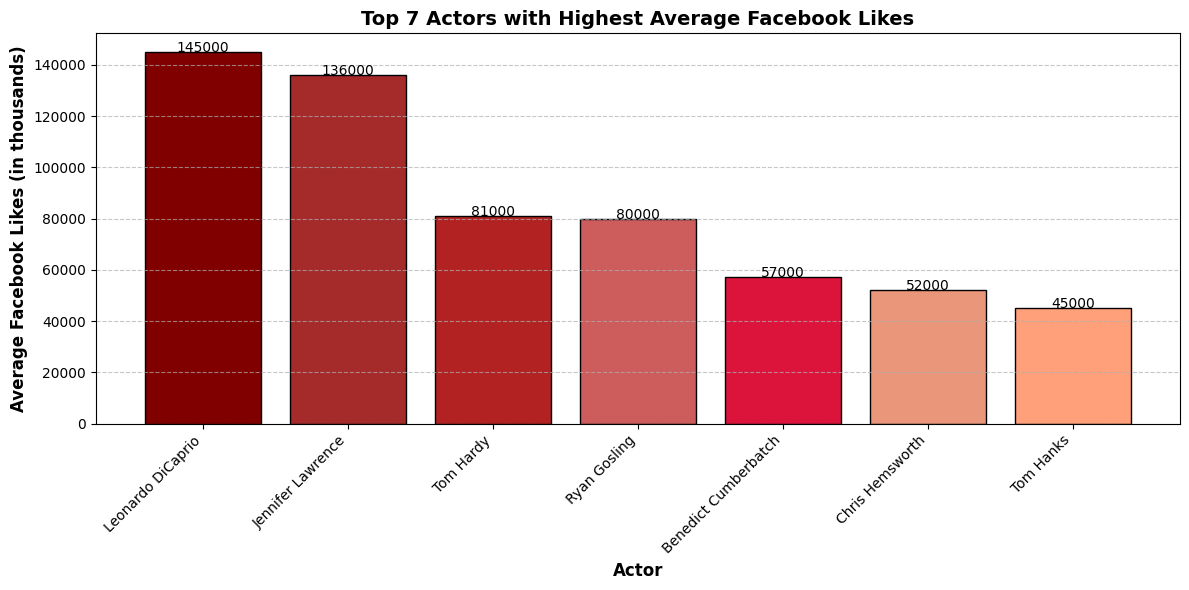

In [ ]:
q3 = df.groupby('actor_1_name')['actor_1_facebook_likes'].sum().reset_index()
q3 = q3.sort_values(by='actor_1_facebook_likes', ascending=False).head(7)
q3.columns = ['Actor', 'Fb_likes']
plt.figure(figsize=(12, 6))
colors = ['#800000', '#a52a2a', '#b22222', '#cd5c5c', '#dc143c', '#e9967a', '#ffa07a']  # Custom color gradient
bars = plt.bar(q3['Actor'], q3['Fb_likes'], color=colors, edgecolor='black')
plt.xlabel('Actor', fontsize=12, fontweight='bold')
plt.ylabel('Average Facebook Likes (in thousands)', fontsize=12, fontweight='bold')
plt.title('Top 7 Actors with Highest Average Facebook Likes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.0f}", ha='center', fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Question: Which genres perform best in terms of revenue and ratings?**

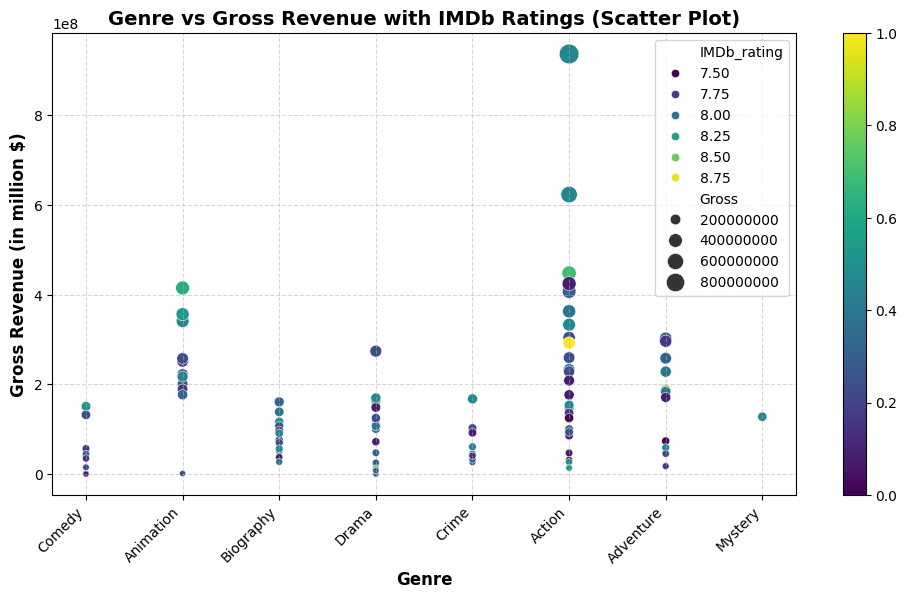

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.gca()
scatter = sns.scatterplot(x='genre_1', y='Gross', hue='IMDb_rating', size='Gross', sizes=(20, 200), data=df, palette='viridis', ax=ax)
plt.xlabel('Genre', fontsize=12, fontweight='bold')
plt.ylabel('Gross Revenue (in million $)', fontsize=12, fontweight='bold')
plt.title('Genre vs Gross Revenue with IMDb Ratings (Scatter Plot)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(scatter.collections[0], ax=ax)

**Question: Do longer movies perform better?**

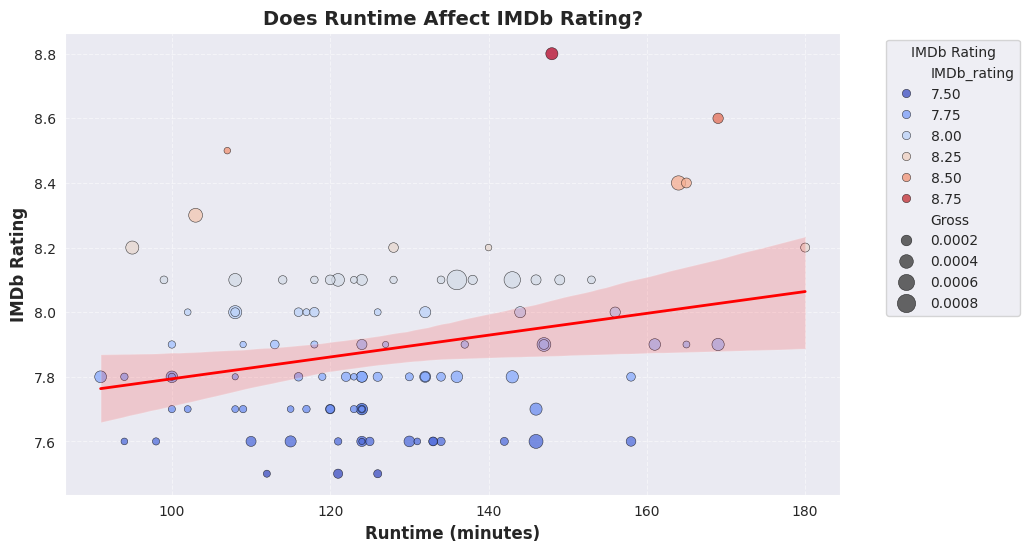

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=df['Runtime'],
    y=df['IMDb_rating'],
    hue=df['IMDb_rating'],
    size=df['Gross'],
    palette='coolwarm',
    sizes=(20, 200),
    alpha=0.75,
    edgecolor='black'
)
sns.regplot(x=df['Runtime'], y=df['IMDb_rating'], scatter=False, color='red', line_kws={"linewidth": 2})
plt.xlabel('Runtime (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('IMDb Rating', fontsize=12, fontweight='bold')
plt.title('Does Runtime Affect IMDb Rating?', fontsize=14, fontweight='bold')
plt.legend(title='IMDb Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Question: Do movies from certain countries or with specific content ratings perform better?**

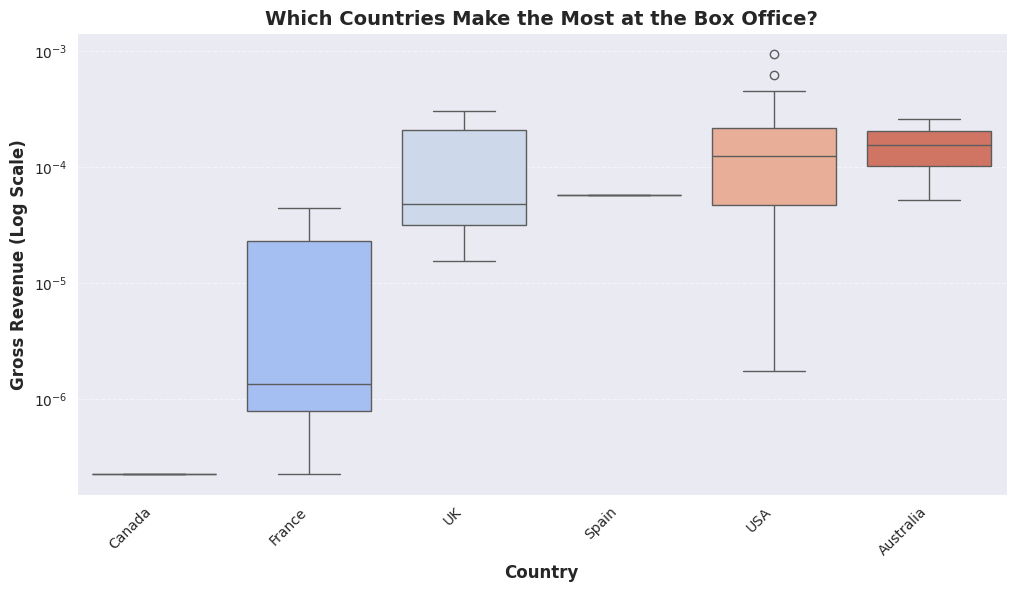

In [ ]:
plt.figure(figsize=(12,6))
ordered_countries = df.groupby('Country')['Gross'].median().sort_values().index
sns.boxplot(
    x=df['Country'],
    y=df['Gross'],
    order=ordered_countries,
    palette='coolwarm'
)
plt.yscale('log')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Gross Revenue (Log Scale)', fontsize=12, fontweight='bold')
plt.title('Which Countries Make the Most at the Box Office?', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Question: Plot year wise Profit on a line chart where profit is Gross - budget**

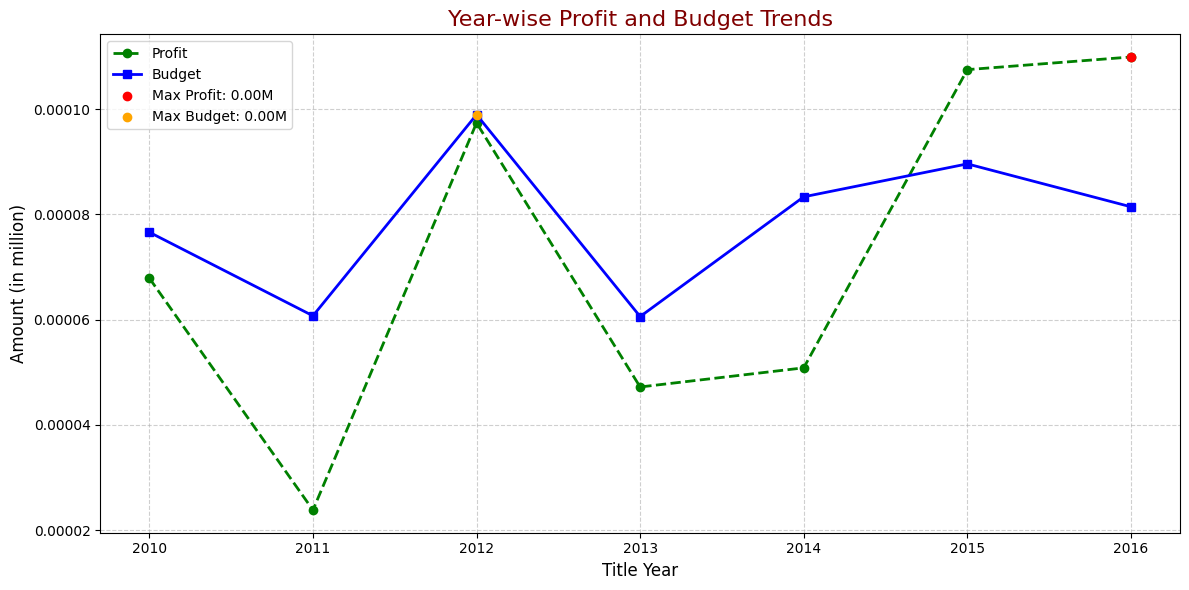

In [ ]:
import matplotlib.pyplot as plt
df["Gross"] = df["Gross"] / 1_000_000
df["budget"] = df["budget"] / 1_000_000
df['Profit'] = df['Gross'] - df['budget']
q2 = df.groupby('title_year')[['budget', 'Profit']].mean().reset_index()
q2 = q2[q2['title_year'].between(1900, 2100)]
plt.figure(figsize=(12, 6))
plt.plot(q2['title_year'], q2['Profit'], color='green', marker='o', linestyle='--', linewidth=2, label='Profit')
plt.plot(q2['title_year'], q2['budget'], color='blue', marker='s', linestyle='-', linewidth=2, label='Budget')
max_profit_year = q2.loc[q2['Profit'].idxmax(), 'title_year']
max_profit = q2['Profit'].max()
plt.scatter(max_profit_year, max_profit, color='red', label=f'Max Profit: {max_profit:.2f}M', zorder=5)
max_budget_year = q2.loc[q2['budget'].idxmax(), 'title_year']
max_budget = q2['budget'].max()
plt.scatter(max_budget_year, max_budget, color='orange', label=f'Max Budget: {max_budget:.2f}M', zorder=5)
plt.title('Year-wise Profit and Budget Trends', fontsize=16, color='maroon')
plt.xlabel('Title Year', fontsize=12)
plt.ylabel('Amount (in million)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()




**Question: What is the distribution of movie genres (genre_1) among the top-rated movies with an IMDb rating greater than 8.0?**

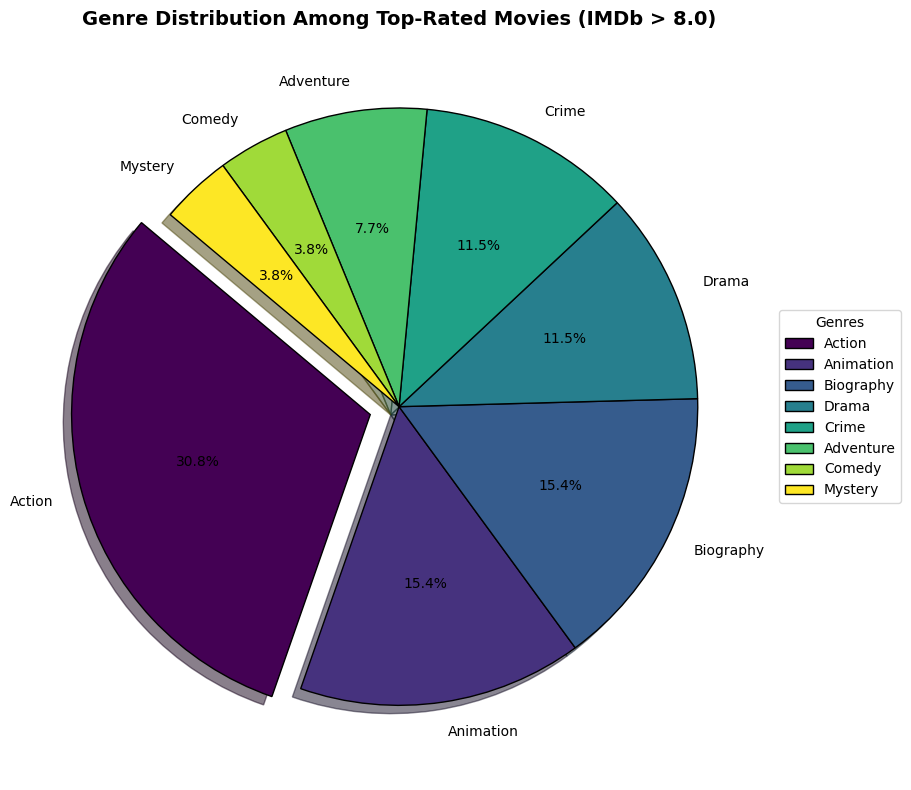

In [ ]:
high_rated_movies = df[df['IMDb_rating'] > 8.0]
genre_counts = high_rated_movies['genre_1'].value_counts()
explode = [0.1 if genre == genre_counts.idxmax() else 0 for genre in genre_counts.index]
colors = plt.cm.viridis([i / 7 for i in range(len(genre_counts))])
plt.figure(figsize = (9,8))
plt.pie(
    genre_counts,
    labels = genre_counts.index,
    autopct = '%1.1f%%',
    explode = explode,
    colors = colors,
    shadow = True,
    startangle = 140,
    wedgeprops={'edgecolor': 'black'}
)
plt.legend(genre_counts.index, title = "Genres", loc = "center left",bbox_to_anchor = (1,0.5))
plt.title('Genre Distribution Among Top-Rated Movies (IMDb > 8.0)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
